In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import numpy as np
import math
ux=3
uy=1
varx=4
vary=4
rho=0
cdfy2 = norm.cdf(8, loc=uy, scale=vary)
cdfy1 = norm.cdf(3, loc=uy, scale=vary)
print(f"THe probablity from p(3<y<8) is {cdfy2-cdfy1}")


THe probablity from p(3<y<8) is 0.26847838186216977


In [14]:
xo=7

cdfy2 = norm.cdf(8, loc=uy+rho*(uy/ux)*(xo-ux), scale=math.sqrt((1-rho*rho))*vary)
cdfy1 = norm.cdf(3, loc=uy+rho*(uy/ux)*(xo-ux), scale=math.sqrt((1-rho*rho))*vary)
print("THe probablity from p(3<y<8 | x=7) is ",{cdfy2-cdfy1})


THe probablity from p(3<y<8 | x=7) is  {0.26847838186216977}


In [15]:
cdfy2 = norm.cdf(3, loc=ux, scale=varx)
cdfy1 = norm.cdf(-3, loc=ux, scale=varx)
print(f"THe probablity from p(-3<x<3) is {cdfy2-cdfy1}")

THe probablity from p(-3<x<3) is 0.4331927987311419


In [16]:
yo=-4
cdfy2 = norm.cdf(3, loc=ux+rho*(ux/uy)*(yo-uy), scale=math.sqrt((1-rho*rho))*varx)
cdfy1 = norm.cdf(-3, loc=ux+rho*(ux/uy)*(yo-uy), scale=math.sqrt((1-rho*rho))*varx)
print("THe probablity from p(-3<x<3 | y=-4) is ",{cdfy2-cdfy1})


THe probablity from p(-3<x<3 | y=-4) is  {0.4331927987311419}


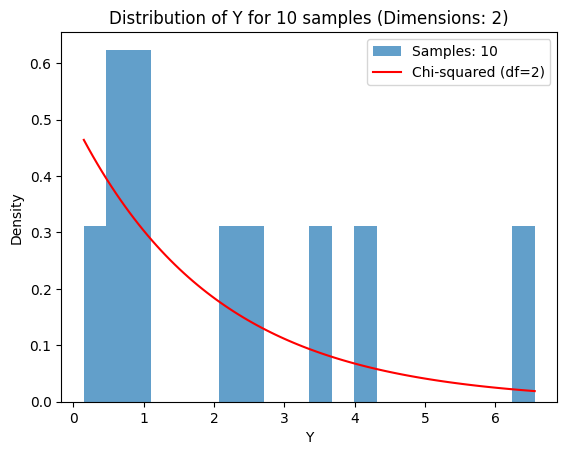

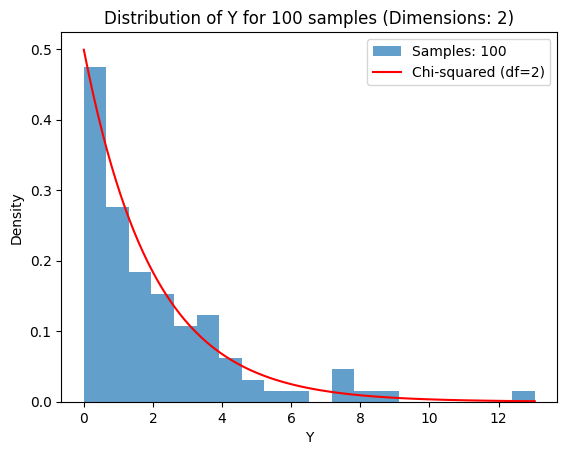

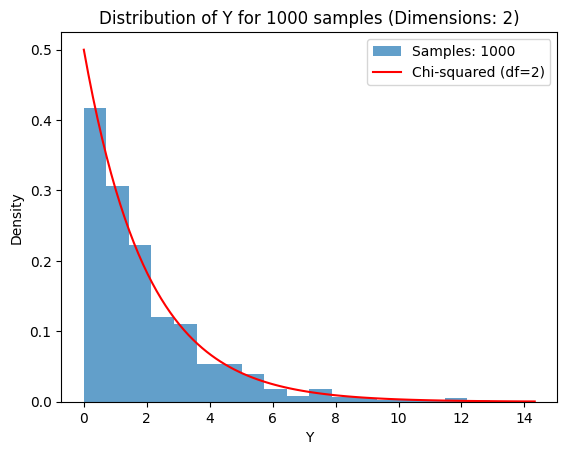

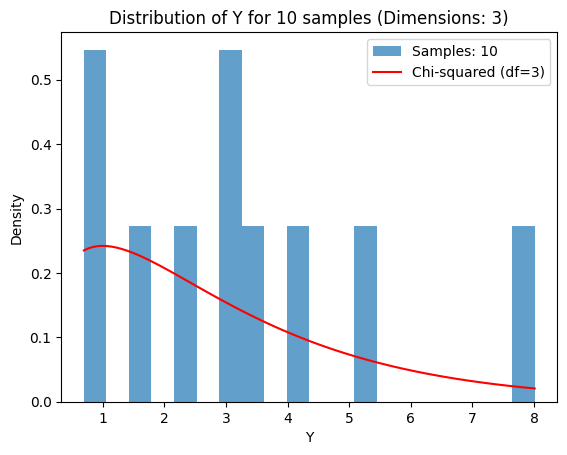

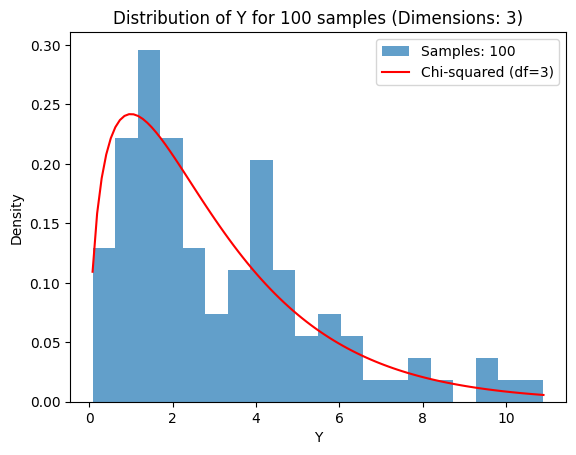

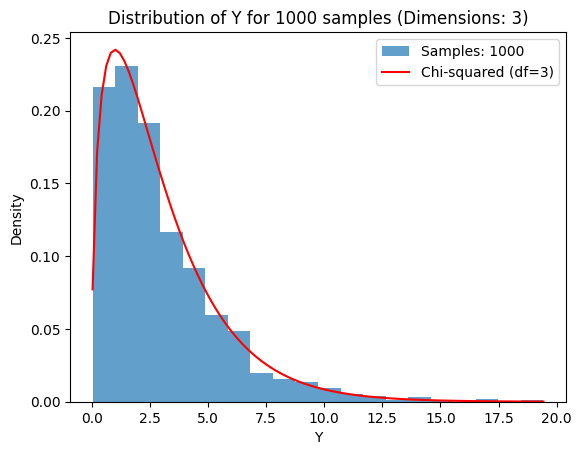

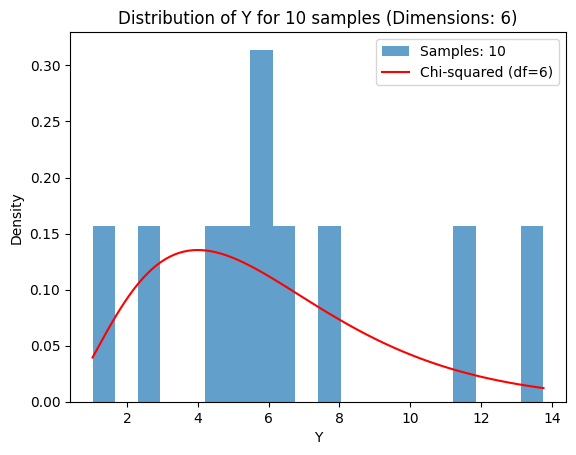

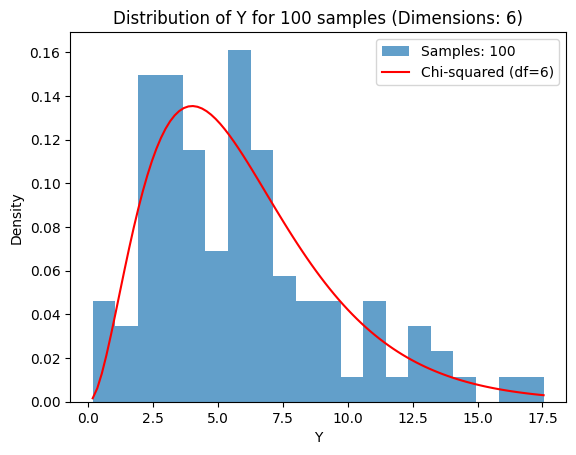

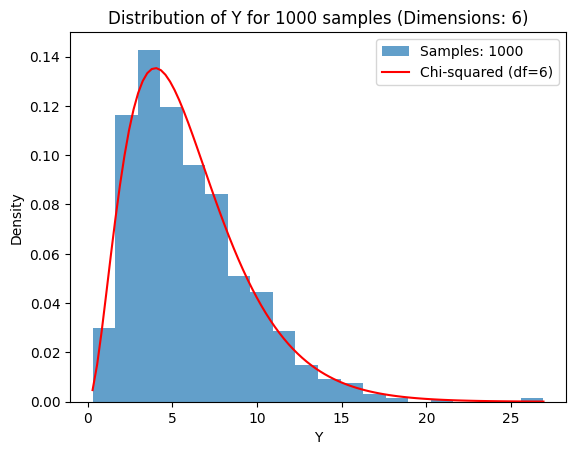

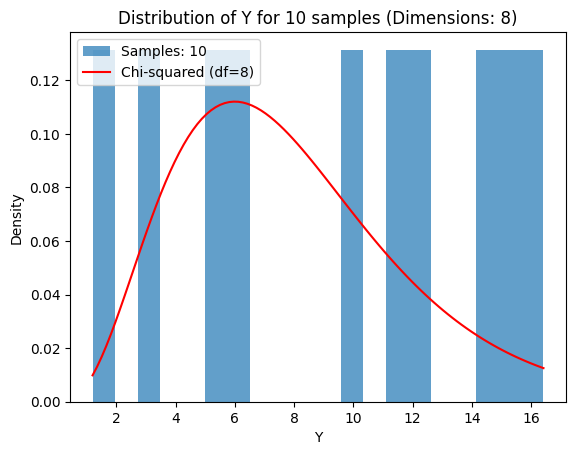

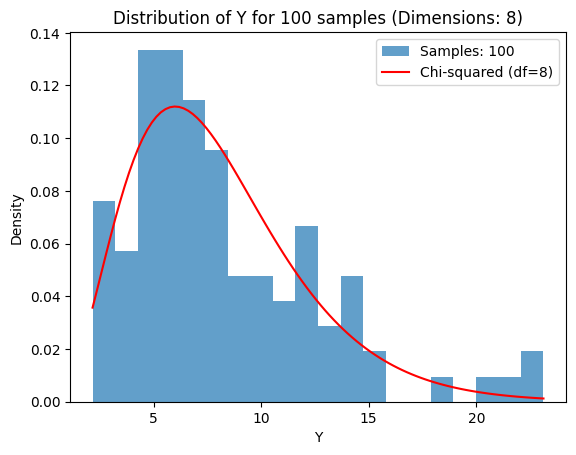

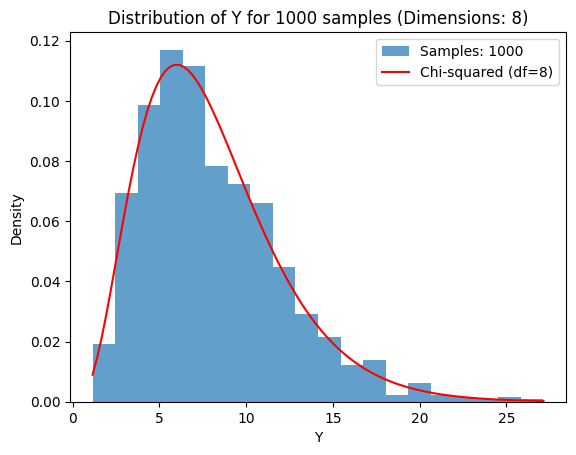

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import scipy.stats as st

p = [2, 3, 6, 8]
s = [10, 100, 1000]

for i in p:
    for k in s:

        mu = np.random.random(i) * 10
        cov = np.zeros((i, i), dtype=float)


        for f in range(i):
            for j in range(f, i):
                if f == j:
                    cov[f][j] = random.uniform(0.1, 50)
                else:
                    cov[f][j] = random.uniform(-50, 50)
                    cov[j][f] = cov[f][j]

        cov = cov.T @ cov


        x = np.random.multivariate_normal(mu, cov, k)

        Y = []
        for sample in x:
            x_minus_mu = sample - mu  # Shape (i,)

            y = x_minus_mu @ np.linalg.inv(cov) @ x_minus_mu.T
            Y.append(y)


        plt.figure()
        plt.hist(Y, bins=20, density=True, alpha=0.7, label=f'Samples: {k}')


        x_vals = np.linspace(min(Y), max(Y), 100)
        plt.plot(x_vals, st.chi2.pdf(x_vals, df=i), 'r-', label=f'Chi-squared (df={i})')

        plt.title(f'Distribution of Y for {k} samples (Dimensions: {i})')
        plt.xlabel('Y')
        plt.ylabel('Density')
        plt.legend()
        plt.show()


In [17]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
c=int(input("Enter value of c :"))
for df in p:



  pdf = st.chi2.pdf(c, df)
  print(f"the value of (y-mu)^t*(sigma)^-1*(y-u)<={c*c} is{pdf} ")


Enter value of c :0
the value of (y-mu)^t*(sigma)^-1*(y-u)<=0 is0.5 
the value of (y-mu)^t*(sigma)^-1*(y-u)<=0 is0.0 
the value of (y-mu)^t*(sigma)^-1*(y-u)<=0 is0.0 
the value of (y-mu)^t*(sigma)^-1*(y-u)<=0 is0.0 


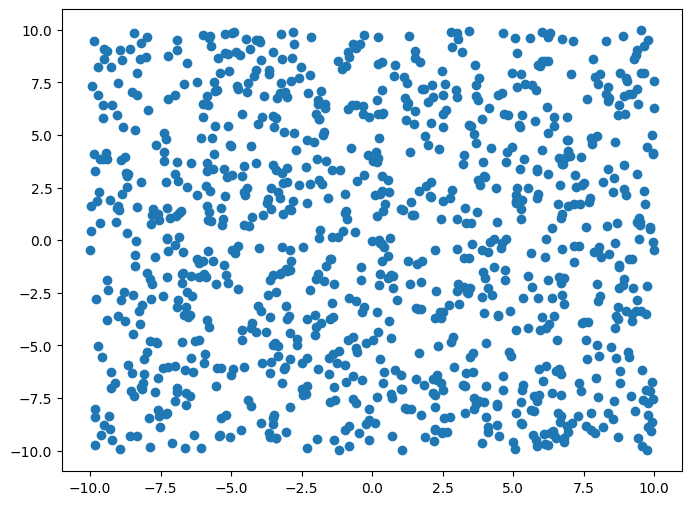

In [18]:
import re
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
with open('File_Datapoints.txt','r') as file:
  text=file.read()
  words= text.split()


l=[]
for i in words:
  l.append(i)
p=['s.no','x','y',]
for i in p:
  l.remove(i)
l
t=0
x=[]
y=[]
for i in l:
  if t==0:
     t=(t+1)%3
  elif t==1:
    t=(t+1)%3
    x.append(i)
  else:
    t=(t+1)%3
    y.append(i)
df=pd.DataFrame(x,columns=['x'])
df['y']=pd.DataFrame(y)
df.index = df.index + 1
df = df.astype(float)
plt.figure(figsize=(8, 6))
plt.scatter(df['x'],df['y'])
plt.show()

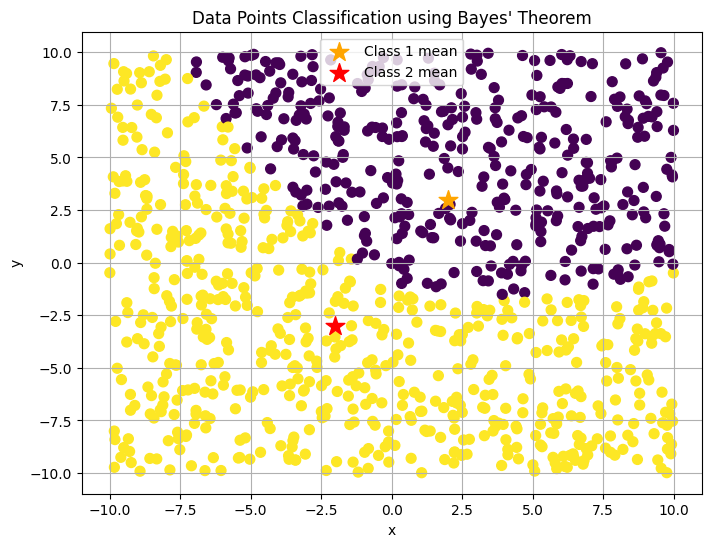

In [19]:
from scipy.stats import multivariate_normal
mu1=[2,3]
mu2=[-2,-3]
sig1=[[1,0.5],[0.5,2]]
sig2=[[2,-0.3],[-0.3,1]]

data=df.iloc[:,]
pl=[]
for i,j in data.iterrows():
  x1=multivariate_normal.pdf(j,mu1,sig1)
  x2=multivariate_normal.pdf(j,mu2,sig2)
  if x1>x2:
    pl.append(1)
  else:
    pl.append(2)
plt.figure(figsize=(8, 6))
plt.scatter(data[data.columns[0]], data[data.columns[1]], c=pl, cmap='viridis', s=50)
plt.scatter(mu1[0], mu1[1], c='orange', marker='*', s=200, label='Class 1 mean')
plt.scatter(mu2[0], mu2[1], c='red', marker='*', s=200, label='Class 2 mean')
plt.title("Data Points Classification using Bayes' Theorem")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()




